# Cluster Analysis




In [23]:
import sys
sys.path.append("..")
from benchmark.results import load_all_results
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, rand_score


sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
sns.set_style("whitegrid")
palette = sns.color_palette("colorblind")

In [24]:
dataset = 'aloi' # 'glove', 'gist', 'pamap2', 'household', 'mnist', 'celeba', 'census, 'aloi'
exact_algorithm = 'faiss' # for high-dimensional datasets, this has to be 'faiss'

data = []
data2 = []

# load all the results that are available for the dataset
for f in load_all_results(dataset, ".."):
    # filter by the exact algorithm
    if f.attrs['algo'] == exact_algorithm and f.attrs['minPts'] == 100:
        labels = np.array(f['labels'])
        points_clustered = len([x for x in np.array(labels) if x >= 0])
        largest_cluster_size = 0
        if len(labels[labels > -1]) > 0:
            largest_cluster_size = max(Counter(labels[labels > -1]).values())/len(labels)
        data.append({
            "eps": f.attrs['eps'],
            "minPts": f.attrs['minPts'],
            "n": len(labels),
            "num_clusters": len(set(labels)),
            "largest_cluster_size": largest_cluster_size, 
            "num_corepoints": len(f['corepoints']),
            "num_noncorepoints": len(labels) - len(f['corepoints']),
            "points_clustered": points_clustered,
            "fraction_clustered": points_clustered/len(labels),
            "fraction_noise": len([x for x in np.array(labels) if x < 0])/len(labels),
            "cluster_sizes": sorted(Counter(labels[labels > -1]).values(),reverse=True),
            "Params": f.attrs['params'],
            #"time": f.attrs['time'],
            })
    if f.attrs['algo'] == 'srrdbscan' and 'delta=0.1' in f.attrs['params'] and 'approx=1.0' in f.attrs['params'] and f.attrs['minPts'] == 100:
        data2.append({
            "eps": f.attrs['eps'],
            "time": f.attrs['time']
            })

df = pd.DataFrame(data=data)
df2 = pd.DataFrame(data=data2)
df

,eps,minPts,n,num_clusters,largest_cluster_size,num_corepoints,num_noncorepoints,points_clustered,fraction_clustered,fraction_noise,cluster_sizes,Params
0,0.0500,100,49534,109,0.938870,44277,5257,46999,0.948823,0.051177,"[46506, 46, 31, 30, 29, 26, 25, 23, 21, 20, 19...",FAISSDBSCAN()
1,0.0008,100,49534,2,0.018613,660,48874,922,0.018613,0.981387,[922],FAISSDBSCAN()
2,0.0020,100,49534,121,0.060060,2434,47100,3262,0.065854,0.934146,"[2975, 27, 20, 17, 17, 12, 10, 10, 9, 8, 7, 7,...",FAISSDBSCAN()
3,0.0300,100,49534,215,0.803912,36838,12696,40814,0.823959,0.176041,"[39821, 263, 40, 35, 33, 30, 27, 22, 20, 19, 1...",FAISSDBSCAN()
4,0.0200,100,49534,291,0.653470,29643,19891,33929,0.684964,0.315036,"[32369, 443, 176, 38, 38, 37, 36, 33, 30, 28, ...",FAISSDBSCAN()
5,0.0050,100,49534,80,0.194392,8136,41398,9805,0.197945,0.802055,"[9629, 49, 24, 12, 8, 4, 3, 3, 3, 1, 1, 1, 1, ...",FAISSDBSCAN()
6,0.0005,100,49534,24,0.007712,340,49194,534,0.010780,0.989220,"[382, 16, 16, 15, 12, 12, 10, 9, 9, 8, 6, 5, 5...",FAISSDBSCAN()
7,0.1000,100,49534,2,0.997860,48954,580,49428,0.997860,0.002140,[49428],FAISSDBSCAN()
8,0.0010,100,49534,5,0.023438,864,48670,1230,0.024831,0.975169,"[1161, 31, 21, 17]",FAISSDBSCAN()
9,0.2000,100,49534,2,0.999939,49500,34,49531,0.999939,0.000061,[49531],FAISSDBSCAN()


In [25]:
df2.sort_values('eps')

,eps,time
6,0.0005,0.633239
1,0.0008,0.576698
8,0.0010,0.536350
2,0.0020,0.500478
5,0.0050,0.548151
10,0.0100,0.831198
4,0.0200,2.540879
3,0.0300,3.477916
0,0.0500,2.461261
7,0.1000,2.043036


Text(0.5, 1.0, 'Number of clusters for aloi with minPts=100')

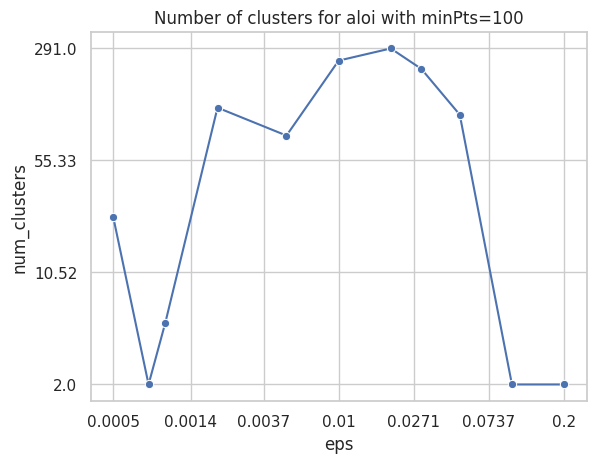

In [26]:
minPts = 100

# sns.set(style="darkgrid")
x_log_min = np.log10(min(df['eps']))
x_log_max = np.log10(max(df['eps']))
xticks = np.logspace(x_log_min, x_log_max, num = 7)
xticks = [round(x, 4) for x in xticks]

y_log_min = np.log10(min(df['num_clusters']))
y_log_max = np.log10(max(df['num_clusters']))
yticks = np.logspace(y_log_min, y_log_max, num = 4)
yticks = [round(x, 2) for x in yticks]

ax = sns.lineplot(data=df, x='eps', y='num_clusters', marker='o')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.minorticks_on()
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
plt.title(f"Number of clusters for {dataset} with minPts={minPts}")


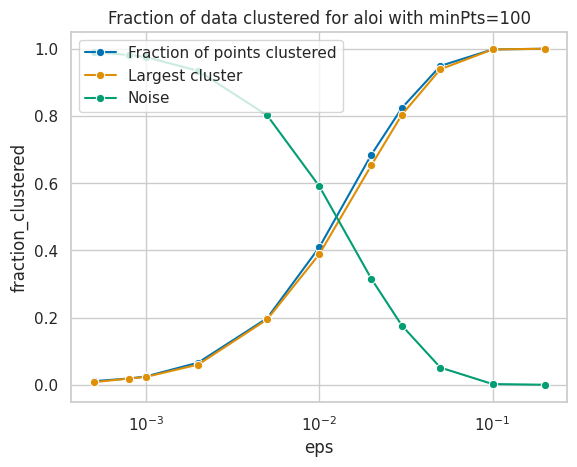

In [27]:
ax = sns.lineplot(data=df, x='eps', y='fraction_clustered', marker='o', label="Fraction of points clustered", color=palette[0])
sns.lineplot(ax=ax, data=df, x='eps', y='largest_cluster_size', marker='o', label="Largest cluster", color=palette[1])
sns.lineplot(ax=ax, data=df, x='eps', y='fraction_noise', marker='o', label="Noise", color=palette[2])
#ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
plt.title(f"Fraction of data clustered for {dataset} with minPts={minPts}")
plt.legend()

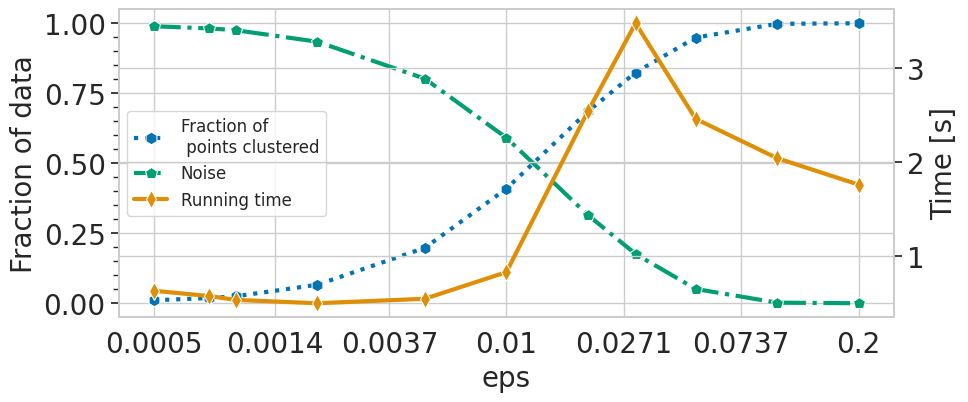

In [28]:
fontsize = 20
ms = 9
thickness = 3
x_log_min = np.log10(min(df2['eps']))
x_log_max = np.log10(max(df2['eps']))

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

ax = sns.lineplot(data=df, x='eps', y='fraction_clustered', 
            marker='h', 
            ms=ms,
            label="Fraction of \n points clustered",
            linestyle=":",
            linewidth=thickness, 
            color=palette[0])
sns.lineplot(ax=ax, data=df, x='eps', y='fraction_noise', 
             marker='p', 
             label="Noise", 
             ms=ms,
             linestyle="-.",
             linewidth=thickness,
             color=palette[2])
ax2 = plt.twinx()
sns.lineplot(ax=ax2, data=df2, x='eps', y='time', 
             marker='d', 
             ms=ms,
             label="Running time", 
             linewidth=thickness,
             color=palette[1])
#ax.set_yscale('log')
#ax.set_xlim(1000) # for mnist
ax.set_xscale('log')
ax.set_ylabel('Fraction of data' , fontsize=fontsize)
#ax.get_yaxis().set_visible(False)
ax2.set_ylabel('Time [s]' , fontsize=fontsize)
ax.set_xlabel('eps', fontsize=fontsize)
ax.minorticks_on()

# Collect handles and labels from both axes
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the handles and labels
handles += handles2
labels += labels2

# Setting gridlines and ticks
xticks = np.logspace(x_log_min, x_log_max, num = 7)
xticks = [round(x, 4) for x in xticks] 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=fontsize)
ax.yaxis.set_tick_params(labelsize = fontsize)
ax2.yaxis.set_tick_params(labelsize = fontsize)

# Create a single legend
ax2.get_legend().remove()
ax.legend(handles, labels, fontsize=12, loc='center left')

# Cluster Quality

In [29]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

dataset = 'aloi'

exact_algorithm = 'faiss'

In [30]:
data = []

exact_data = {}
for f in load_all_results(dataset, ".."):
    if f.attrs['algo'] == exact_algorithm:
        exact_data[f.attrs['eps']] = (np.array(f['labels']), np.array(f['corepoints']), np.array(f['borderpoints']))
    else:
        data.append({
            "clustering": np.array(f['labels']),
            "time": f.attrs['time'],
            "algo": f.attrs['algo'],
            "eps": f.attrs['eps'],
            "params": f.attrs.get("params", "")
        })

metrics = []

for eps, (gt_labels, corepoints, borderpoints) in exact_data.items():
    filtered_data = [d for d in data if d['eps'] == eps]
    # remove border points
    gt_labels[borderpoints] = -1
    #print("corepoints:", corepoints)
    for d in filtered_data:
        if "delta=0.1" in d['params']:
            if "approx=1.0" in d['params']:   
                labels = d["clustering"]
                labels[borderpoints] = -1
                metrics.append({
                    "eps": eps,
                    "time": d['time'],
                    "algo": d["algo"],
                    "ARI": adjusted_rand_score(gt_labels, labels),
                    "NMI": normalized_mutual_info_score(gt_labels, labels),
                    "params": d.get("params", "")
                })
        else:
            labels = d["clustering"]
            labels[borderpoints] = -1
            metrics.append({
                "eps": eps,
                "time": d['time'],
                "algo": d["algo"],
                "ARI": adjusted_rand_score(gt_labels, labels),
                "NMI": normalized_mutual_info_score(gt_labels, labels),
                "params": d.get("params", "")
                })

if dataset == 'gist':
    quality_df = pd.DataFrame(data)
    quality_df.sort_values(by=["eps"])
else:
    quality_df = pd.DataFrame(metrics)
    quality_df.sort_values(by=["eps", "ARI", "NMI"])

In [31]:
for i in range(len(quality_df)):
    if quality_df['algo'][i] == 'srrdbscan':
        if "approx" in quality_df['params'][i]:
            if "approx=1.0" in quality_df['params'][i]:
                print(quality_df['params'][i][16:35].split(",")[0], str("&"),
                    quality_df['eps'][i], str("&"),
                    round(quality_df['time'][i], 2), str("&"),
                    round(quality_df['ARI'][i], 4), str(r"\\"))
        elif "approx" not in quality_df['params'][i]:
            print(quality_df['params'][i][16:35].split(",")[0], str("&"),
                quality_df['eps'][i], str("&"),
                round(quality_df['time'][i], 2), str("&"),
                round(quality_df['ARI'][i], 4), str(r"\\"))

0.1 & 0.05 & 2.46 & 0.986 \\
0.01 & 0.05 & 4.95 & 0.9876 \\
0.9 & 0.05 & 1.05 & 0.5645 \\
0.5 & 0.05 & 1.87 & 0.9277 \\
0.1 & 0.0008 & 0.58 & 0.9444 \\
0.01 & 0.0008 & 0.89 & 0.9423 \\
0.9 & 0.0008 & 0.37 & 0.9243 \\
0.5 & 0.0008 & 0.48 & 0.9374 \\
0.1 & 0.002 & 0.5 & 0.9179 \\
0.01 & 0.002 & 0.8 & 0.9163 \\
0.9 & 0.002 & 0.35 & 0.7948 \\
0.5 & 0.002 & 0.29 & 0.9098 \\
0.1 & 0.03 & 3.48 & 0.9631 \\
0.01 & 0.03 & 3.53 & 0.9643 \\
0.9 & 0.03 & 0.66 & 0.0084 \\
0.5 & 0.03 & 0.85 & 0.8861 \\
0.1 & 0.02 & 2.54 & 0.9489 \\
0.01 & 0.02 & 2.42 & 0.9521 \\
0.9 & 0.02 & 0.52 & 0.1444 \\
0.5 & 0.02 & 0.58 & 0.8564 \\
0.1 & 0.005 & 0.55 & 0.9641 \\
0.01 & 0.005 & 1.32 & 0.9651 \\
0.9 & 0.005 & 0.37 & 0.8269 \\
0.5 & 0.005 & 0.42 & 0.9399 \\
0.1 & 0.0005 & 0.63 & 0.9311 \\
0.01 & 0.0005 & 0.75 & 0.927 \\
0.9 & 0.0005 & 0.38 & 0.7887 \\
0.5 & 0.0005 & 0.4 & 0.9201 \\
0.1 & 0.1 & 2.04 & 1.0 \\
0.01 & 0.1 & 2.88 & 1.0 \\
0.9 & 0.1 & 1.04 & 0.0084 \\
0.5 & 0.1 & 1.44 & 0.9124 \\
0.1 & 0.001 & 0.54 & 0.

# Running time plot

In [32]:
data = []

for i in range(len(pd.DataFrame(metrics)['ARI'])):
    if pd.DataFrame(metrics)['ARI'][i] > 0.7:
        data.append({
            "time": pd.DataFrame(metrics)['time'][i],
            "algo": pd.DataFrame(metrics)['algo'][i],
            "eps": pd.DataFrame(metrics)['eps'][i],
            })

df = pd.DataFrame(data)
df = pd.DataFrame(df.sort_values(by=["algo", "eps", "time"],ignore_index=True))

times = []
times.append({
    "time": df['time'][0],
    "algo": df['algo'][0],
    "eps": df['eps'][0],
})
for i in range(1, len(df['time'])):
    if df['eps'][i] != df['eps'][i-1] or df['algo'][i] != df['algo'][i-1]:
        times.append({
            "time": df['time'][i],
            "algo": df['algo'][i],
            "eps": df['eps'][i],
        })

for f in load_all_results(dataset, ".."):
    if f.attrs['algo'] == exact_algorithm:
        times.append({
            "time": f.attrs['time'],
            "algo": f.attrs['algo'],
            "eps": f.attrs['eps'],
        })

times = pd.DataFrame(times)

[Text(0, 0.29, '0.29'),
 Text(0, 3.45, '3.45'),
 Text(0, 40.8, '40.8'),
 Text(0, 482.69, '482.69'),
 Text(0, 5710.52, '5710.52')]

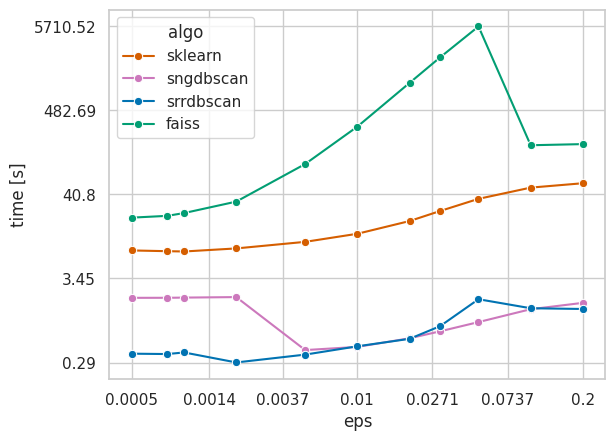

In [33]:
custom_palette = {"srrdbscan": palette[0], 
                  "tpedbscan": palette[1], 
                  "faiss": palette[2], 
                  "sklearn": palette[3], 
                  "sngdbscan": palette[4],
                  "IP.LSH.DBSCAN": palette[4]}

ax = sns.lineplot(data=times, x='eps', y='time', hue="algo", marker='o', palette=custom_palette)
ax.set_ylabel('time [s]')
ax.set_xscale("log")
ax.set_yscale("log")

# Set gridlines and ticks
x_log_min = np.log10(min(times['eps']))
x_log_max = np.log10(max(times['eps']))
xticks = np.logspace(x_log_min, x_log_max, num = 7)
xticks = [round(x, 4) for x in xticks]
y_log_min = np.log10(min(times['time']))
y_log_max = np.log10(max(times['time']))
yticks = np.logspace(y_log_min, y_log_max, num = 5)
yticks = [round(x, 2) for x in yticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

In [34]:
Algo = ['srrdbscan', 'sngdbscan', 'tpedbscan', 'faiss', 'sklearn', 'IP.LSH.DBSCAN']
eps = [0.0008, 0.002, 0.01, 0.03, 0.1] # aloi

M = [[0 for _ in range(len(eps))] for _ in range(len(Algo))]
x=0
y=0

for i in range(len(times)):
    if times["eps"][i] in eps:
        x = Algo.index(times["algo"][i])
        y = eps.index(times["eps"][i])
        M[x][y] = str(round(times["time"][i], 2))

for i in range(len(Algo)):
    for j in range(len(eps)):
        if M[i][j] == 0.0:
            M[i][j] = 'Missing'

for j in range(len(eps)):
    print(str("&"), eps[j], str("&"), 
          M[0][j], str("&"), 
          M[1][j], str("&"), 
          M[2][j], str("&"), 
          M[3][j], str("&"), 
          M[4][j], str(r"\\"))


& 0.0008 & 0.37 & 1.95 & Missing & 21.75 & 7.69 \\
& 0.002 & 0.29 & 1.99 & Missing & 33.05 & 8.34 \\
& 0.01 & 0.47 & 0.46 & Missing & 300.02 & 12.84 \\
& 0.03 & 0.85 & 0.73 & Missing & 2296.78 & 25.06 \\
& 0.1 & 1.44 & 1.4 & Missing & 173.44 & 49.88 \\


In [35]:
for i in range(len(eps)): 
    print(eps[i])

0.0008
0.002
0.01
0.03
0.1


## Collective running time plot

In [36]:
sets = {"aloi": [27, 0.0005, 0.2], 
    "celeba": [39, 0.4, 8.0], 
    "census": [500, 0.01, 10.0], 
    "gist": [960, 0.2, 10.0], 
    "glove": [100, 1, 20.0], 
    "household": [7, 0.01, 1000.0], 
    "mnist": [784, 500.0, 10000], 
    "pamap2": [4, 0.1, 500.0]}


data = []

for dataset in sets:
    for f in load_all_results(dataset, ".."):
        if dataset == "aloi" or dataset == "mnist" or dataset == "pamap2":
            if f.attrs['algo'] == 'srrdbscan' and f.attrs['params'][16:35].split(",")[0] == '0.1' and "1.0" in f.attrs['params'] :
                data.append({
                    "data": dataset,
                    "eps": (f.attrs['eps'] - sets[dataset][1])/(sets[dataset][2] - sets[dataset][1]),
                    #"eps": f.attrs['eps']/sets[dataset][1],
                    "time": f.attrs['time']/(len(f['labels'])*sets[dataset][0])
                    })
        else:
            if f.attrs['algo'] == 'srrdbscan' and f.attrs['params'][16:35].split(",")[0] == '0.1':
                data.append({
                    "data": dataset,
                    "eps": (f.attrs['eps'] - sets[dataset][1])/(sets[dataset][2] - sets[dataset][1]),
                    #"eps": f.attrs['eps']/sets[dataset][1],
                    "time": f.attrs['time']/(len(f['labels'])*sets[dataset][0])
                    })


df = pd.DataFrame(data=data)
df

,data,eps,time
0,aloi,0.248120,1.840308e-06
1,aloi,0.001504,4.312027e-07
2,aloi,0.007519,3.742121e-07
3,aloi,0.147870,2.600471e-06
4,aloi,0.097744,1.899839e-06
...,...,...,...
107,pamap2,0.019804,4.422527e-06
108,pamap2,1.000000,2.720755e-06
109,pamap2,1.000000,2.529102e-06
110,pamap2,0.002801,3.826029e-06


In [37]:
x_log_min = np.log10(min(df['eps']))
x_log_max = np.log10(max(df['eps']))

df['eps']

/tmp/ipykernel_292328/665235534.py:1: RuntimeWarning: divide by zero encountered in log10
  x_log_min = np.log10(min(df['eps']))


0      0.248120
1      0.001504
2      0.007519
3      0.147870
4      0.097744
         ...   
107    0.019804
108    1.000000
109    1.000000
110    0.002801
111    0.002801
Name: eps, Length: 112, dtype: float64

/tmp/ipykernel_292328/1709101797.py:4: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  ax = sns.lineplot(data=df, x='eps', y='time', hue="data", marker='o', markersize = 7, linewidth = 2.5, palette=palette)
/tmp/ipykernel_292328/1709101797.py:13: RuntimeWarning: divide by zero encountered in log10
  x_log_min = np.log10(min(df['eps']))
/home/cabi/.local/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/cabi/.local/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start


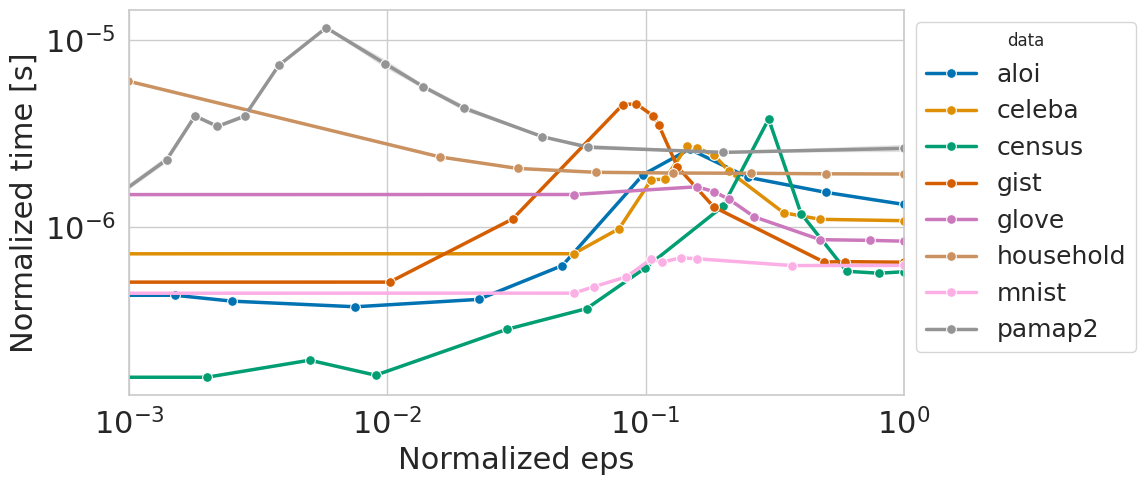

In [38]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax = sns.lineplot(data=df, x='eps', y='time', hue="data", marker='o', markersize = 7, linewidth = 2.5, palette=palette)
ax.set_xlim(0.001, 1)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("Normalized eps", fontsize = 22)
ax.set_ylabel("Normalized time [s]", fontsize = 22)

x_log_min = np.log10(min(df['eps']))
x_log_max = np.log10(max(df['eps']))
xticks = np.logspace(x_log_min, x_log_max, num = 7)
xticks = [round(x, 4) for x in xticks]
y_log_min = np.log10(min(df['time']))
y_log_max = np.log10(max(df['time']))
#yticks = np.logspace(y_log_min, y_log_max, num = 5)
#yticks = [round(x, 2) for x in yticks]
# ax.set_xticks(xticks)
#ax.set_xticklabels(xticks)
#ax.set_yticks(yticks)
#ax.set_yticklabels(yticks)

ax.xaxis.set_tick_params(labelsize = 22)
ax.yaxis.set_tick_params(labelsize = 22)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize = 18)

# Approximation factor analysis

In [39]:
dataset = 'aloi'

exact_algorithm = 'faiss'

In [40]:
data = []
exact_clustering = []

exact_data = {}
for f in load_all_results(dataset, ".."):
    if f.attrs['algo'] == exact_algorithm:
        exact_data[f.attrs['eps']] = (np.array(f['labels']), np.array(f['corepoints']), np.array(f['borderpoints']))
        labels_true = np.array(f['labels'])
        points_clustered = len([x for x in np.array(labels_true) if x >= 0])
        exact_clustering.append({
            "eps": f.attrs['eps'],
            "fraction_clustered": points_clustered/len(labels_true)
        })
    else:
        data.append({
            "clustering": np.array(f['labels']),
            "time": f.attrs['time'],
            "algo": f.attrs['algo'],
            "eps": f.attrs['eps'],
            "params": f.attrs.get("params", "")
        })


metrics = []

for eps, (gt_labels, corepoints, borderpoints) in exact_data.items():
    filtered_data = [d for d in data if d['eps'] == eps]
    # remove border points
    gt_labels[borderpoints] = -1
    for d in filtered_data:
        labels = d["clustering"]
        labels[borderpoints] = -1
        metrics.append({
            "eps": eps,
            "time": d['time'],
            "algo": d["algo"],
            "ARI": adjusted_rand_score(gt_labels, labels),
            "NMI": normalized_mutual_info_score(gt_labels, labels),
            "params": d.get("params", "")
        })

exact_clustering = pd.DataFrame(exact_clustering)
quality_df = pd.DataFrame(metrics)

In [41]:
quality_srr = quality_df[(quality_df['algo'] == 'srrdbscan') & (quality_df['params'].str.contains('approx'))]
quality_srr.reset_index(drop=True, inplace=True)

for i in range(len(quality_srr)):
    quality_srr['params'][i] = f"c={float(quality_srr['params'][i].split()[4][7:-1])}"

quality_srr = quality_srr[['eps', 'time', 'ARI', 'params']].sort_values(['eps', 'params'])

/tmp/ipykernel_292328/3613940368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_srr['params'][i] = f"c={float(quality_srr['params'][i].split()[4][7:-1])}"
/tmp/ipykernel_292328/3613940368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_srr['params'][i] = f"c={float(quality_srr['params'][i].split()[4][7:-1])}"
/tmp/ipykernel_292328/3613940368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_srr['param

/tmp/ipykernel_292328/3036134091.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.lineplot(data=quality_srr, x='eps', y='ARI', hue='params', marker='o', palette=palette)


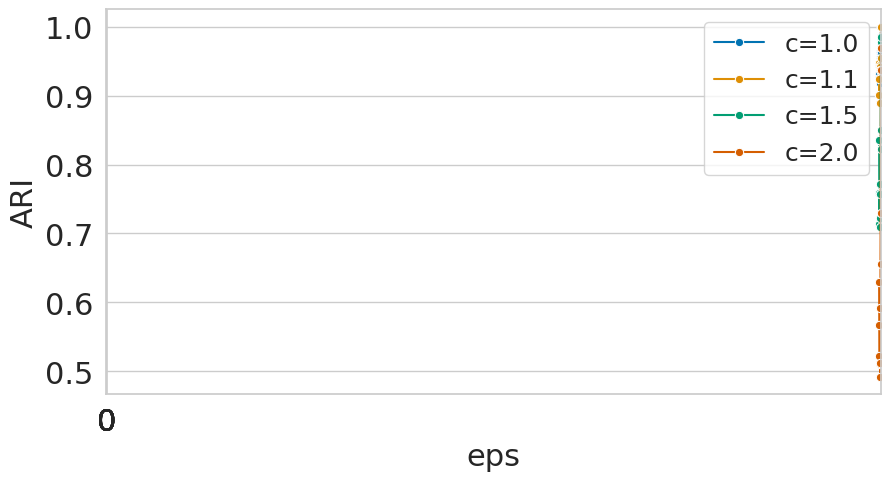

In [ ]:
x_log_min = np.log10(min(exact_clustering['eps']))
x_log_max = np.log10(max(exact_clustering['eps']))

palette = sns.color_palette("colorblind")

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax = sns.lineplot(data=quality_srr, x='eps', y='ARI', hue='params', marker='o', palette=palette)

#ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
# ax2 = plt.twinx()
# sns.lineplot(ax=ax2, data=exact_clustering, x='eps', y='fraction_clustered', 
             # marker='d',
             # label="Fraction clustered",
             # color=palette[-1])
# plt.title(f"ARI score for different approximation factors - {dataset}", fontsize = 25)

# Collect handles and labels from both axes
handles, labels = ax.get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the handles and labels
# handles += handles2
# labels += labels2

# Setting gridlines and ticks
xticks = np.logspace(x_log_min, x_log_max, num = 7) # number should be 7 for aloi
xticks = [round(x, 4) for x in xticks] # round should take 4 for aloi
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize = 22)
ax.set_xlabel('eps', fontsize = 22)

ax.yaxis.set_tick_params(labelsize = 22)
ax.set_ylabel('ARI', fontsize = 22)
# ax2.yaxis.set_tick_params(labelsize = 22)
# ax2.set_ylabel('Fraction clustered', fontsize = 22)

# Create a single legend
# ax2.get_legend().remove()
ax.legend(handles, labels, fontsize = 18)

/tmp/ipykernel_292328/1832578248.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.lineplot(data=quality_srr, x='eps', y='time', hue='params', marker='o', palette=palette)


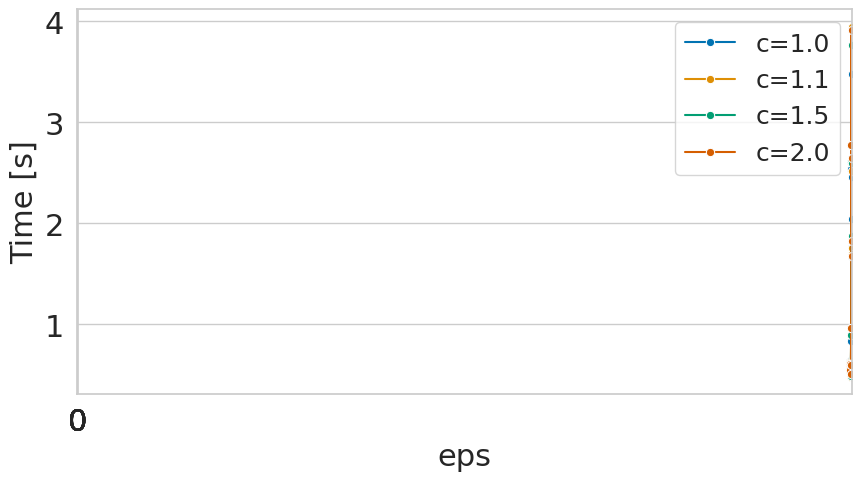

In [43]:
x_log_min = np.log10(min(exact_clustering['eps']))
x_log_max = np.log10(max(exact_clustering['eps']))

palette = sns.color_palette("colorblind")

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax = sns.lineplot(data=quality_srr, x='eps', y='time', hue='params', marker='o', palette=palette)

#ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
# ax2 = plt.twinx()
# sns.lineplot(ax=ax2, data=exact_clustering, x='eps', y='fraction_clustered', 
             # marker='d',
             # label="Fraction clustered",
             # color=palette[-1])
# plt.title(f"Running times for different approximation factors - {dataset}", fontsize = 25)

# Collect handles and labels from both axes
handles, labels = ax.get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the handles and labels
# handles += handles2
# labels += labels2

# Setting gridlines and ticks
xticks = np.logspace(x_log_min, x_log_max, num = 8) # number should be 8 for mnist, 7 for aloi
xticks = [int(round(x, -2)) for x in xticks] # round should take -2 and add int() for mnist (nearest 100 and remove decimals), 4 for aloi, 1 for pamap2 - you might also want to take int(round(x, -2)) for mnist
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_xticklabels(xticks, fontsize = 22)
ax.set_xlabel('eps', fontsize = 22)

ax.yaxis.set_tick_params(labelsize = 22)
ax.set_ylabel('Time [s]', fontsize = 22)
# ax2.yaxis.set_tick_params(labelsize = 22)
# ax2.set_ylabel('Fraction clustered', fontsize = 22)

# Create a single legend
# ax2.get_legend().remove()
ax.legend(handles, labels, fontsize = 18, loc="best") # loc = "center left" for aloi